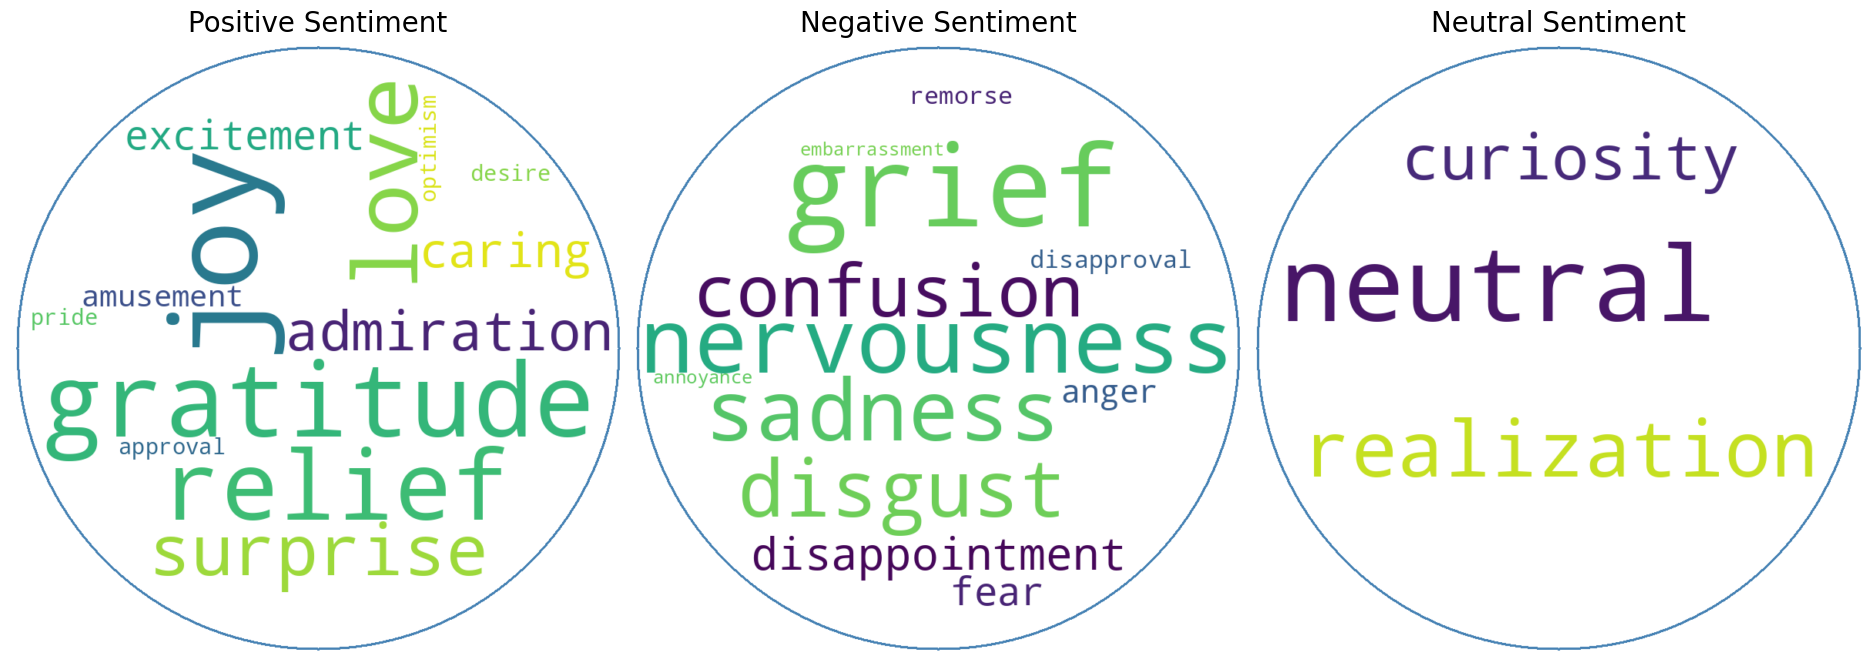

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

# Create a mask for circular shape
x, y = np.ogrid[:800, :800]
mask = (x - 400) ** 2 + (y - 400) ** 2 > 390 ** 2
mask = 255 * mask.astype(int)

# Define the word cloud creation function
def create_circular_wordcloud(text, title, ax):
    wordcloud = WordCloud(
        width=800, height=800, background_color='white',
        contour_width=3, contour_color='steelblue',
        max_words=100,
        mask=mask,
        collocations=False
    ).generate_from_frequencies(text)

    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(title, size=20)
    ax.axis('off')

# Define the frequency dictionaries for each sentiment
positive_emotions = {
    'joy': 100, 'gratitude': 80, 'relief': 70, 'love': 60, 'surprise': 50,
    'admiration': 40, 'caring': 30, 'excitement': 20, 'amusement': 10,
    'desire': 5, 'pride': 5, 'optimism': 5, 'approval': 5
}

negative_emotions = {
    'grief': 100, 'nervousness': 80, 'sadness': 70, 'disgust': 60,
    'confusion': 50, 'disappointment': 40, 'fear': 30, 'anger': 20,
    'remorse': 10, 'disapproval': 10, 'embarrassment': 5, 'annoyance': 5
}

neutral_emotions = {
    'neutral': 100, 'realization': 50, 'curiosity': 30
}

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(24, 8), gridspec_kw={'wspace': 0, 'hspace': 0})

# Create word clouds on the same line
create_circular_wordcloud(positive_emotions, 'Positive Sentiment', axs[0])
create_circular_wordcloud(negative_emotions, 'Negative Sentiment', axs[1])
create_circular_wordcloud(neutral_emotions, 'Neutral Sentiment', axs[2])

plt.subplots_adjust(wspace=-0.3)
plt.show()


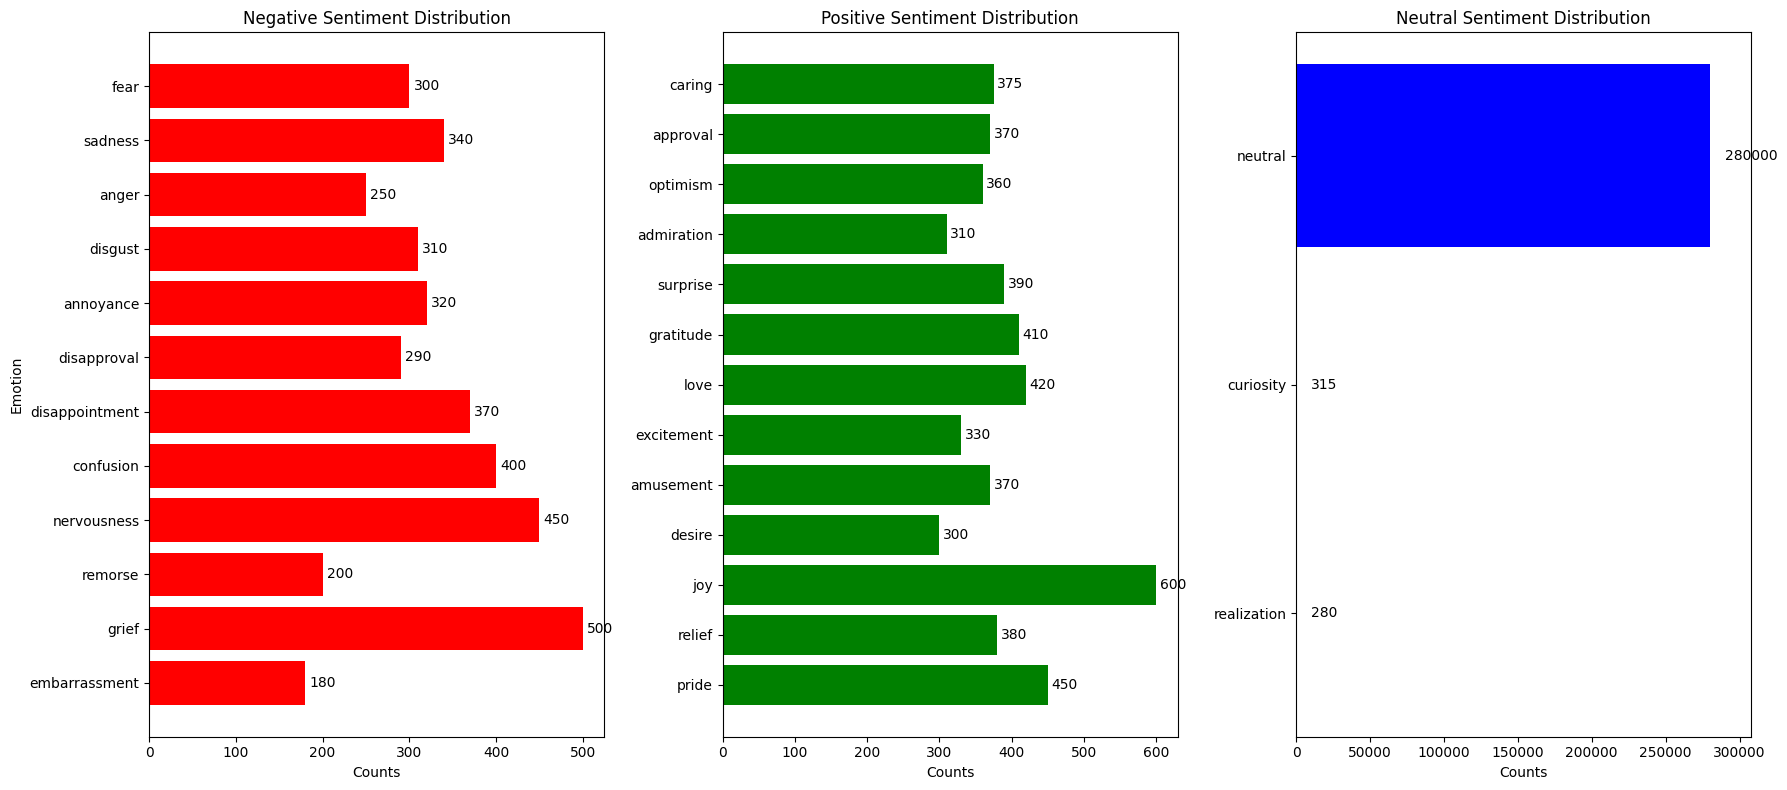

In [7]:
import matplotlib.pyplot as plt

# Data from the original emotion distribution chart
data = {
    'Emotion': ['pride', 'embarrassment', 'grief', 'relief', 'remorse', 'nervousness', 'joy', 'desire', 'confusion',
                'disappointment', 'realization', 'amusement', 'disapproval', 'annoyance', 'disgust', 'excitement',
                'love', 'gratitude', 'surprise', 'admiration', 'anger', 'sadness', 'optimism', 'approval', 'fear',
                'curiosity', 'caring', 'neutral'],
    'Counts': [450, 180, 500, 380, 200, 450, 600, 300, 400, 370, 280, 370, 290, 320, 310, 330, 420, 410, 390, 310,
               250, 340, 360, 370, 300, 315, 375, 280000]
}

emotion_to_sentiment = {
    'anger': 'negative', 'disgust': 'negative', 'fear': 'negative', 'sadness': 'negative', 'grief': 'negative',
    'remorse': 'negative', 'nervousness': 'negative', 'confusion': 'negative', 'disappointment': 'negative',
    'disapproval': 'negative', 'annoyance': 'negative', 'embarrassment': 'negative', 'joy': 'positive',
    'love': 'positive', 'optimism': 'positive', 'relief': 'positive', 'surprise': 'positive', 'admiration': 'positive',
    'amusement': 'positive', 'excitement': 'positive', 'desire': 'positive', 'gratitude': 'positive', 'pride': 'positive',
    'approval': 'positive', 'caring': 'positive', 'neutral': 'neutral', 'realization': 'neutral', 'curiosity': 'neutral'
}

# Separate data into different sentiments
negative_data = {'Emotion': [], 'Counts': []}
positive_data = {'Emotion': [], 'Counts': []}
neutral_data = {'Emotion': [], 'Counts': []}

for emotion, count in zip(data['Emotion'], data['Counts']):
    sentiment = emotion_to_sentiment[emotion]
    if sentiment == 'negative':
        negative_data['Emotion'].append(emotion)
        negative_data['Counts'].append(count)
    elif sentiment == 'positive':
        positive_data['Emotion'].append(emotion)
        positive_data['Counts'].append(count)
    elif sentiment == 'neutral':
        neutral_data['Emotion'].append(emotion)
        neutral_data['Counts'].append(count)

# Adjust the xlim for neutral chart to fit all data
max_count = max(neutral_data['Counts'])

# Plot the charts
fig, axes = plt.subplots(1, 3, figsize=(18, 8), sharey=False)

# Negative Sentiment Distribution
bars = axes[0].barh(negative_data['Emotion'], negative_data['Counts'], color='red')
axes[0].set_title('Negative Sentiment Distribution')
axes[0].set_xlabel('Counts')
axes[0].set_ylabel('Emotion')
for bar in bars:
    width = bar.get_width()
    axes[0].text(width + 5, bar.get_y() + bar.get_height()/2, f'{int(width)}', va='center')

# Positive Sentiment Distribution
bars = axes[1].barh(positive_data['Emotion'], positive_data['Counts'], color='green')
axes[1].set_title('Positive Sentiment Distribution')
axes[1].set_xlabel('Counts')
for bar in bars:
    width = bar.get_width()
    axes[1].text(width + 5, bar.get_y() + bar.get_height()/2, f'{int(width)}', va='center')

# Neutral Sentiment Distribution
bars = axes[2].barh(neutral_data['Emotion'], neutral_data['Counts'], color='blue')
axes[2].set_title('Neutral Sentiment Distribution')
axes[2].set_xlabel('Counts')
axes[2].set_xlim(0, max_count * 1.1)  # Adjust xlim to ensure visibility of all emotions
axes[2].set_xticks(range(0, max_count + 50000, 50000))  # Adjust the count steps for better visibility
for bar in bars:
    width = bar.get_width()
    axes[2].text(width + 10000, bar.get_y() + bar.get_height()/2, f'{int(width)}', va='center')

plt.tight_layout()
plt.show()
